# Predvidevanje obrabljenosti orodja s pomočjo                         strojnega učenja

Dataset v notebooku last: University of Michigan SMART Lab 
https://www.kaggle.com/shasun/tool-wear-detection-in-cnc-mill/version/1#README.txt

In [26]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

In [86]:
path = 'C:/Users/python_zan/Downloads/data01/zdruzeno12.csv'

df = pd.read_csv(path)

df = df.drop(df.columns[0], axis=1)

df['Tool_Condition'] = df.Tool_Condition.map({'unworn':1, 'worn':0})

df['Zaporedna_meritev'] = np.arange(len(df))

# 11. experiment se podvoji saj 12. ni bil popolen

## Predstavitev data seta:

In [87]:
df.head()



,#,Material,Tool_Condition,Feedrate,Clamp Pressure,x_ActualPosition,x_ActualVelocity,x_ActualAcceleration,x_CommandPosition,x_CommandVelocity,...,s_OutputVoltage,s_OutputPower,SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Process,Finalizes,Visual Inspection,Zaporedna_meritev
0,1,wax,1,6,4.0,198.0,0.0,0.00,198.0,0.0,...,0.0,6.960000e-07,12.0,1.0,0.0,50.0,Starting,Yes,Yes,0
1,1,wax,1,6,4.0,198.0,-10.8,-350.00,198.0,-13.6,...,0.0,-5.270000e-07,12.0,1.0,4.0,50.0,Prep,Yes,Yes,1
2,1,wax,1,6,4.0,196.0,-17.8,-6.25,196.0,-17.9,...,0.0,9.100000e-07,12.0,1.0,7.0,50.0,Prep,Yes,Yes,2
3,1,wax,1,6,4.0,194.0,-18.0,0.00,194.0,-17.9,...,0.0,1.070000e-06,12.0,1.0,7.0,50.0,Prep,Yes,Yes,3
4,1,wax,1,6,4.0,193.0,-17.9,-18.80,192.0,-17.9,...,0.0,1.960000e-06,12.0,1.0,7.0,50.0,Prep,Yes,Yes,4


## Opombe priložene k datasetu:

Vsaka vrstica v data setu je posneta v intervalu 100 ms.

x_/y_/z_ v predponi:

-   ActualPosition: actual x/y/z position of part (mm)
-	ActualVelocity: actual x/y/z velocity of part (mm/s)
-	ActualAcceleration: actual x/y/z acceleration of part (mm/s/s)
-	CommandPosition: reference  x/y/z position of part (mm)
-	CommandVelocity: reference  x/y/z velocity of part (mm/s)
-	CommandAcceleration: reference  x/y/z acceleration of part (mm/s/s)
-	CurrentFeedback: current (A)
-	DCBusVoltage: voltage (V)
-	OutputCurrent: current (A)
-	OutputVoltage: voltage (V)
-	OutputPower: power (v kW)

s_ v predponi:

-	ActualPosition: actual position of spindle (mm)
-	ActualVelocity: actual velocity of spindle (mm/s)
-	ActualAcceleration: actual acceleration of spindle (mm/s/s)
-	CommandPosition: reference position of spindle (mm)
-	CommandVelocity: reference velocity of spindle (mm/s)
-	CommandAcceleration: reference acceleration of spindle (mm/s/s)
-	CurrentFeedback: current (A)
-	DCBusVoltage: voltage (V)
-	OutputCurrent: current (A)
-	OutputVoltage: voltage (V)
-	OutputPower: current (A)
-	SystemInertia: torque inertia (kg*m^2)

M1_ v predponi:

-  M1_CURRENT_PROGRAM_NUMBER: number the program is listed under on the CNC
-  M1_sequence_number: line of G-code being executed
-  M1_CURRENT_FEEDRATE: spindle speed (mm/s)
        
Note: Some variables will not accurately reflect the operation of the
    CNC machine. This can usually be detected by when:
    -M1_CURRENT_FEEDRATE reads 50,
    -when X1 ActualPosition reads 198,
    -when M1_CURRENT_PROGRAM_NUMBER does not read 0.
    
The source of these errors has not been identified. 




In [30]:
#Odstranimo napake v datasetu

df = df[df.x_ActualPosition !=198]

df = df[df.M1_CURRENT_FEEDRATE !=50]


In [31]:
#Posododobljen data set

In [38]:
df.head()

,#,Material,Tool_Condition,Feedrate,Clamp Pressure,x_ActualPosition,x_ActualVelocity,x_ActualAcceleration,x_CommandPosition,x_CommandVelocity,...,s_OutputVoltage,s_OutputPower,SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Process,Finalizes,Visual Inspection,Zaporedna_meritev
31,1,wax,1,6,4.0,151.0,0.075,37.50,151.0,0.0,...,44.9,0.1500,12.0,1.0,12.0,6.0,Layer 1 Up,Yes,Yes,31
32,1,wax,1,6,4.0,151.0,-0.075,-37.50,151.0,0.0,...,72.8,0.2310,12.0,1.0,14.0,6.0,Layer 1 Up,Yes,Yes,32
33,1,wax,1,6,4.0,151.0,-6.000,6.25,150.0,-6.0,...,88.4,0.3410,12.0,1.0,14.0,6.0,Layer 1 Up,Yes,Yes,33
34,1,wax,1,6,4.0,150.0,-6.150,-43.80,150.0,-6.0,...,109.0,0.4410,12.0,1.0,14.0,6.0,Layer 1 Up,Yes,Yes,34
35,1,wax,1,6,4.0,149.0,-5.930,62.50,149.0,-6.0,...,112.0,0.0746,12.0,1.0,14.0,6.0,Layer 1 Up,Yes,Yes,35


In [37]:
df.info()
# Ker 'Process', 'Finalizes', 'Visual Inspection', 
# ne bodo sodelovale v učenju jih ni treba spreminjati


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17859 entries, 31 to 25323
Data columns (total 56 columns):
#                            17859 non-null int64
Material                     17859 non-null object
Tool_Condition               17859 non-null int64
Feedrate                     17859 non-null int64
Clamp Pressure               17859 non-null float64
x_ActualPosition             17859 non-null float64
x_ActualVelocity             17859 non-null float64
x_ActualAcceleration         17859 non-null float64
x_CommandPosition            17859 non-null float64
x_CommandVelocity            17859 non-null float64
x_CommandAcceleration        17859 non-null float64
x_CurrentFeedback            17859 non-null float64
x_DCBusVoltage               17859 non-null float64
x_OutputCurrent              17859 non-null float64
x_OutputVoltage              17859 non-null float64
x_OutputPower                17859 non-null float64
y_ActualPosition             17859 non-null float64
y_ActualVeloc

Text(0, 0.5, 'Obrabljeno orodje/Neobrabljeno orodje')

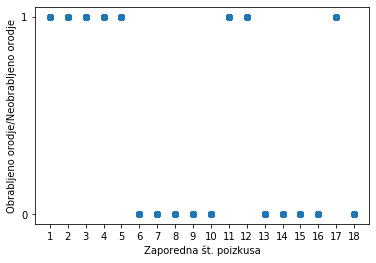

In [29]:
plt.plot( '#', 'Tool_Condition','o', data=df,)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
plt.yticks([0,1])
plt.xlabel('Zaporedna št. poizkusa')
plt.ylabel('Obrabljeno orodje/Neobrabljeno orodje')

#Graf prikazuje stanje oroja glede na zaporedni eksperiment

([<matplotlib.axis.XTick at 0x4b90b08828>,
 <a list of 3 Text xticklabel objects>)

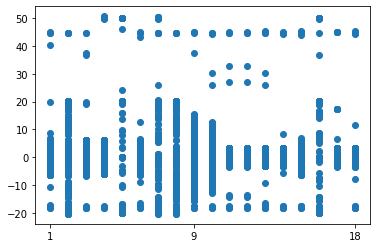

In [88]:
# Z grafom preverimo, če smo se znebili napak v podatkih

plt.plot('#', 'x_ActualVelocity', 'o', data=df)
plt.xticks([1,9,18])

## Priprava podatkov za Keras

In [89]:

x_train= df.drop(columns=['#','Feedrate', 'Material','Tool_Condition',
                          'Process', 'Finalizes', 'Visual Inspection',
                          'Zaporedna_meritev'], axis=1)

x_train.head()

,Clamp Pressure,x_ActualPosition,x_ActualVelocity,x_ActualAcceleration,x_CommandPosition,x_CommandVelocity,x_CommandAcceleration,x_CurrentFeedback,x_DCBusVoltage,x_OutputCurrent,...,s_CommandAcceleration,s_CurrentFeedback,s_DCBusVoltage,s_OutputCurrent,s_OutputVoltage,s_OutputPower,SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE
0,4.0,198.0,0.0,0.00,198.0,0.0,0.000000,0.18,0.0207,329.0,...,0.0,0.524,2.740000e-19,329.0,0.0,6.960000e-07,12.0,1.0,0.0,50.0
1,4.0,198.0,-10.8,-350.00,198.0,-13.6,-358.000000,-10.90,0.1860,328.0,...,0.0,-0.288,2.740000e-19,328.0,0.0,-5.270000e-07,12.0,1.0,4.0,50.0
2,4.0,196.0,-17.8,-6.25,196.0,-17.9,-0.000095,-8.59,0.1400,328.0,...,0.0,0.524,2.740000e-19,328.0,0.0,9.100000e-07,12.0,1.0,7.0,50.0
3,4.0,194.0,-18.0,0.00,194.0,-17.9,-0.000095,-6.11,0.1300,327.0,...,0.0,-0.180,2.740000e-19,328.0,0.0,1.070000e-06,12.0,1.0,7.0,50.0
4,4.0,193.0,-17.9,-18.80,192.0,-17.9,0.000095,-5.70,0.1140,328.0,...,0.0,0.226,2.740000e-19,328.0,0.0,1.960000e-06,12.0,1.0,7.0,50.0


In [81]:
y_train = df[['Tool_Condition']]

#podatki za trening
y_train.head()

,Tool_Condition
31,1
32,1
33,1
34,1
35,1


# Keras

In [82]:
from keras.models import Sequential
from keras import optimizers
import sklearn
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2)
x_test.head()

,Clamp Pressure,x_ActualPosition,x_ActualVelocity,x_ActualAcceleration,x_CommandPosition,x_CommandVelocity,x_CommandAcceleration,x_CurrentFeedback,x_DCBusVoltage,x_OutputCurrent,...,s_CommandAcceleration,s_CurrentFeedback,s_DCBusVoltage,s_OutputCurrent,s_OutputVoltage,s_OutputPower,SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE
12876,4.0,157.0,2.970,18.80,157.0,3.0,0.0,5.75,0.1050,327.0,...,0.000000e+00,20.6,0.895,319.0,118.0,0.171,12.0,1.0,122.0,3.0
24986,2.5,162.0,0.075,50.00,162.0,0.0,0.0,4.16,0.0655,327.0,...,0.000000e+00,17.9,0.931,320.0,116.0,0.180,12.0,1.0,83.0,3.0
18105,3.0,144.0,-3.130,-18.80,144.0,-3.0,0.0,-4.58,0.0889,327.0,...,0.000000e+00,16.3,0.829,323.0,118.0,0.157,12.0,1.0,128.0,3.0
7598,4.0,145.0,20.100,6.25,145.0,20.0,0.0,4.47,0.1130,324.0,...,9.540000e-07,20.7,1.010,313.0,116.0,0.194,12.0,1.0,29.0,20.0
15022,4.0,162.0,0.025,31.30,162.0,0.0,0.0,4.15,0.0651,327.0,...,9.540000e-07,25.1,1.110,319.0,116.0,0.213,12.0,1.0,84.0,3.0


In [84]:
classifier = Sequential()

# Adding the input layer and the first hidden layer

classifier.add(Dense(output_dim = 30, init = 'uniform', activation = 'relu', input_dim = 48))

# Adding the second hidden layer

classifier.add(Dense(output_dim =30 , init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim =30 , init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim =30 , init = 'uniform', activation = 'relu'))

# Adding the output layer

classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

#optimizacija

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#fit

classifier.fit(x_train, y_train, batch_size = 10, nb_epoch = 250)

C:\Users\python_zan\Anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=48, units=30, kernel_initializer="uniform")`
  """
C:\Users\python_zan\Anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=30, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\python_zan\Anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=30, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\python_zan\Anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=30, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\pyth

Epoch 1/250
14287/14287 [==============================] - 5s 368us/step - loss: 0.6903 - acc: 0.5329
Epoch 2/250
14287/14287 [==============================] - 3s 242us/step - loss: 0.6881 - acc: 0.5436
Epoch 3/250
14287/14287 [==============================] - 3s 243us/step - loss: 0.6824 - acc: 0.5641
Epoch 4/250
14287/14287 [==============================] - 3s 244us/step - loss: 0.6801 - acc: 0.5618
Epoch 5/250
14287/14287 [==============================] - 3s 244us/step - loss: 0.6724 - acc: 0.5758
Epoch 6/250
14287/14287 [==============================] - 4s 248us/step - loss: 0.6640 - acc: 0.5872
Epoch 7/250
14287/14287 [==============================] - 4s 253us/step - loss: 0.6458 - acc: 0.6173
Epoch 8/250
14287/14287 [==============================] - 4s 304us/step - loss: 0.6345 - acc: 0.6323
Epoch 9/250
14287/14287 [==============================] - 4s 268us/step - loss: 0.6268 - acc: 0.6386
Epoch 10/250
14287/14287 [==============================] - 4s 260us/step - loss: 

14287/14287 [==============================] - 3s 237us/step - loss: 0.3554 - acc: 0.8330
Epoch 160/250
14287/14287 [==============================] - 4s 245us/step - loss: 0.3611 - acc: 0.8306
Epoch 161/250
14287/14287 [==============================] - 4s 245us/step - loss: 0.3557 - acc: 0.8308
Epoch 162/250
14287/14287 [==============================] - 3s 239us/step - loss: 0.3593 - acc: 0.8299
Epoch 163/250
14287/14287 [==============================] - 3s 241us/step - loss: 0.3556 - acc: 0.8322
Epoch 164/250
14287/14287 [==============================] - 4s 254us/step - loss: 0.3488 - acc: 0.8339
Epoch 165/250
14287/14287 [==============================] - 4s 253us/step - loss: 0.3478 - acc: 0.8330
Epoch 166/250
14287/14287 [==============================] - 4s 254us/step - loss: 0.3498 - acc: 0.8336
Epoch 167/250
14287/14287 [==============================] - 4s 249us/step - loss: 0.3441 - acc: 0.8364
Epoch 168/250
14287/14287 [==============================] - 4s 257us/step - l